In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

df = pd.read_csv('../data/online_retail.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

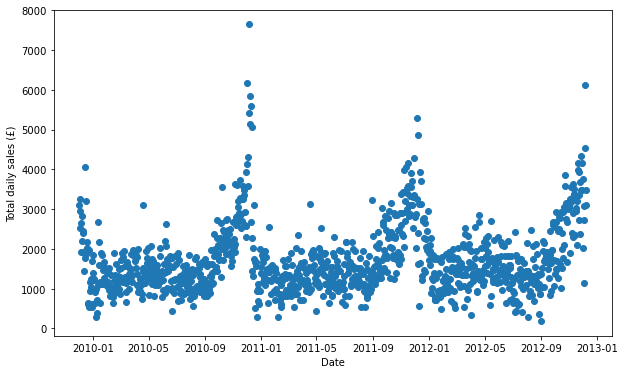

In [2]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'])
plt.xlabel('Date')
plt.ylabel('Total daily sales (£)')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


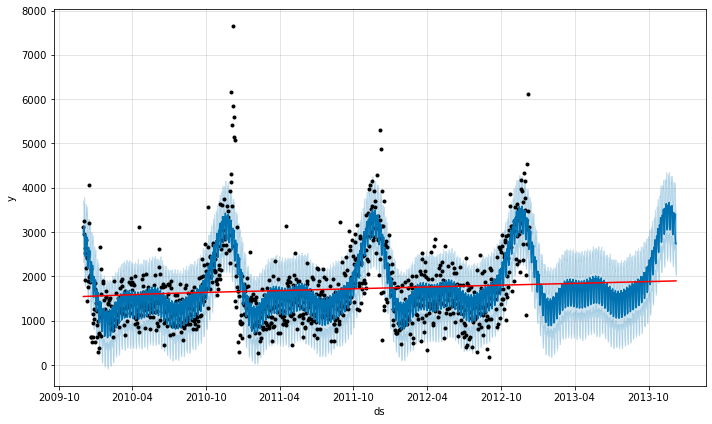

In [3]:
model = Prophet(yearly_seasonality=4)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

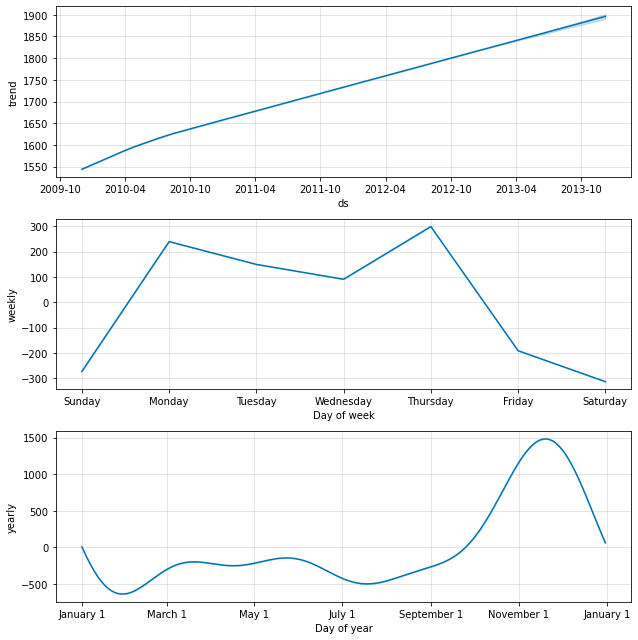

In [4]:
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
from fbprophet.diagnostics import cross_validation

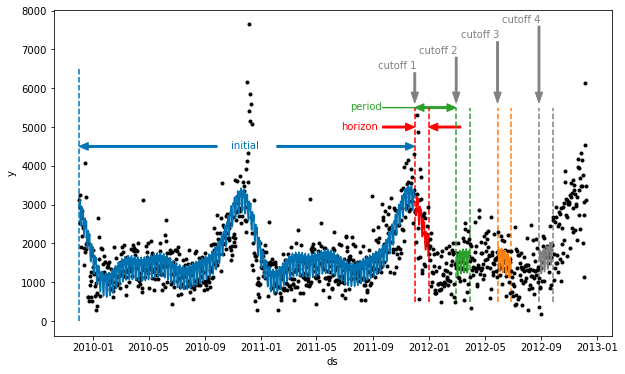

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], 'k.')
plt.vlines([df['ds'][730], df['ds'][760]], 500, 5500, colors='r', linestyles='--')
plt.vlines([df['ds'][820], df['ds'][850]], 500, 5500, colors='tab:green', linestyles='--')
plt.vlines([df['ds'][910], df['ds'][940]], 500, 5500, colors='tab:orange', linestyles='--')
plt.vlines([df['ds'][1000], df['ds'][1030]], 500, 5500, colors='gray', linestyles='--')
plt.vlines([df['ds'][0]], 0, 6500, colors='#0072B2', linestyles='--')

plt.plot(forecast[forecast['ds'] < df['ds'][730]]['ds'],
         forecast[forecast['ds'] < df['ds'][730]]['yhat'],
         c='#0072B2')

plt.plot(forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['ds'],
         forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['yhat'], c='r')

plt.plot(forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['ds'],
         forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['yhat'], c='tab:green')

plt.plot(forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['ds'],
         forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['yhat'], c='tab:orange')

plt.plot(forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['ds'],
         forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['yhat'], c='gray')

plt.arrow(df['ds'][660], 5000, 50, 0, width=50, head_width=200, head_length=20, color='r')
plt.arrow(df['ds'][830], 5000, -50, 0, width=50, head_width=200, head_length=20, color='r')
plt.text(df['ds'][570], 4950, 'horizon', color='r')

plt.arrow(df['ds'][660], 5500, 140, 0, width=10, head_width=200, head_length=20, color='tab:green')
plt.arrow(df['ds'][800], 5500, -50, 0, width=50, head_width=200, head_length=20, color='tab:green')
plt.text(df['ds'][590], 5450, 'period', color='tab:green')

plt.arrow(df['ds'][730], 6400, 0, -500, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][650], 6500, 'cutoff 1', color='gray')

plt.arrow(df['ds'][820], 6800, 0, -900, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][740], 6900, 'cutoff 2', color='gray')

plt.arrow(df['ds'][910], 7200, 0, -1300, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][830], 7300, 'cutoff 3', color='gray')

plt.arrow(df['ds'][1000], 7600, 0, -1700, width=4, head_width=16, head_length=280, color='gray')
plt.text(df['ds'][920], 7700, 'cutoff 4', color='gray')

plt.arrow(df['ds'][300], 4500, -280, 0, width=50, head_width=200, head_length=20, color='#0072B2')
plt.arrow(df['ds'][430], 4500, 280, 0, width=50, head_width=200, head_length=20, color='#0072B2')
plt.text(df['ds'][330], 4450, 'initial', color='#0072B2')

plt.xlabel('ds')
plt.ylabel('y')

plt.show()

In [7]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 2011-12-14 00:00:00 and 2012-09-09 00:00:00


In [8]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.207224,2098.063782,3499.519395,3702.986147,2011-12-14
1,2011-12-16,2352.337392,1634.810094,3052.763414,1229.263629,2011-12-14
2,2011-12-17,2182.401681,1492.200544,2859.880672,1325.415023,2011-12-14
3,2011-12-18,2165.497675,1474.927212,2853.864822,2739.454215,2011-12-14
4,2011-12-19,2636.183079,1881.843041,3401.333705,2699.823386,2011-12-14


In [9]:
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                         parallel='processes')

INFO:fbprophet:Making 10 forecasts with cutoffs between 2011-12-14 00:00:00 and 2012-09-09 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000219923FD288>
